In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\clean_data\gurgaon_properties_outlier_treated.csv")

In [4]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,0,flat,parsvnath green ville,sector 48,1.60,8377.0,1910.0,Super Built up area 1910(177.44 sq.m.)Built Up...,3.0,3.0,3,13.0,North-West,Old Property,1910.0,1700.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0,636.666667
1,1,house,independent,sector 43,8.25,30556.0,2700.0,Plot area 300(250.84 sq.m.),5.0,6.0,3+,3.0,West,Moderately Old,NaN,2700.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,64.0,540.000000
2,3,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3.0,3.0,3+,6.0,North-West,Moderately Old,NaN,NaN,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,883.333333
3,4,flat,emaar imperial gardens,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3.0,3.0,3+,9.0,North,Relatively New,NaN,NaN,2000.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0,666.666667
4,6,flat,sare crescent parc,sector 92,0.49,4910.0,998.0,Carpet area: 998 (92.72 sq.m.),2.0,2.0,2,2.0,NaN,Relatively New,NaN,NaN,998.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,499.000000


In [5]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1686
built_up_area          1971
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

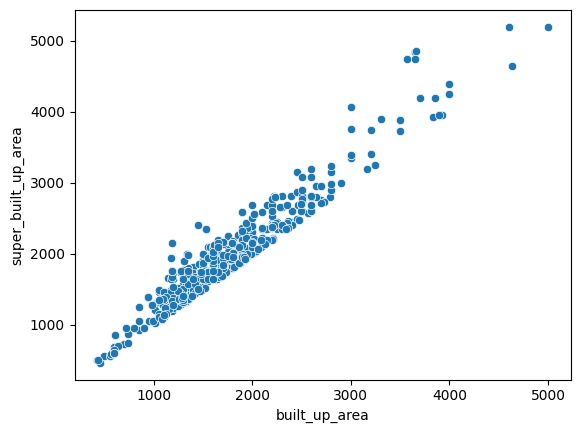

In [6]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

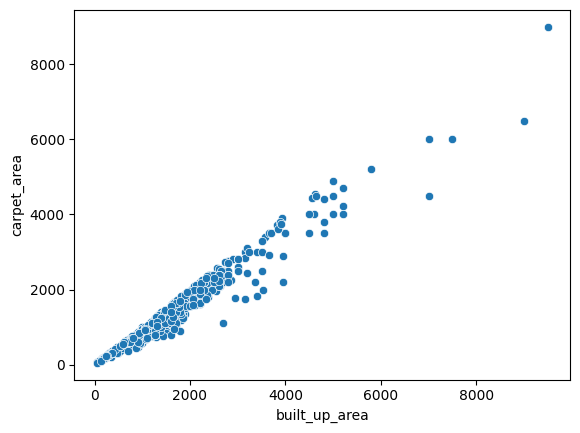

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'],data=df)

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

np.int64(0)

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(529, 25)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.900280112044818


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
20,23,flat,tulip violet,sector 69,1.70,8458.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4.0,4.0,2,10.0,South-West,Relatively New,2010.0,NaN,1610.0,1.0,1.0,1.0,1.0,0.0,0.0,174.0,502.500000
33,36,flat,ambience lagoon,sector 24,4.25,13281.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,3.0,4.0,3+,3.0,North-East,Old Property,3200.0,NaN,3156.0,0.0,1.0,0.0,1.0,0.0,2.0,143.0,1066.666667
59,63,flat,shree vardhman victoria,sector 70,1.50,7692.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,5.0,3,7.0,South,Relatively New,1950.0,NaN,1161.0,0.0,1.0,0.0,0.0,0.0,2.0,174.0,650.000000
79,83,flat,experion the heartsong,sector 108,1.30,8344.0,1558.0,Super Built up area 1758(163.32 sq.m.)Carpet a...,3.0,3.0,3+,7.0,South-West,Relatively New,1758.0,NaN,1558.0,1.0,0.0,0.0,0.0,0.0,0.0,150.0,519.333333
83,87,flat,tulip violet,sector 69,3.10,9823.0,3156.0,Super Built up area 3156(293.2 sq.m.)Carpet ar...,4.0,6.0,3+,14.0,North,Relatively New,3156.0,NaN,2500.0,0.0,1.0,0.0,1.0,0.0,0.0,174.0,789.000000


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1686
built_up_area          1552
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,7,flat,experion the heartsong,sector 108,0.90,7015.0,1283.0,Super Built up area 1283(119.19 sq.m.),2.0,3.0,3,7.0,East,Relatively New,1283.0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,72.0,641.500000
12,14,flat,eldeco accolade,sohna road,1.10,7550.0,1457.0,Super Built up area 1457(135.36 sq.m.),3.0,2.0,3,13.0,NaN,Relatively New,1457.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,56.0,485.666667
18,20,flat,pioneer urban presidia,sector 62,6.50,14987.0,4337.0,Super Built up area 4337(402.92 sq.m.),4.0,4.0,3+,3.0,West,Moderately Old,4337.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,86.0,1084.250000
19,22,flat,dlf regal gardens,sector 90,1.75,7901.0,2215.0,Super Built up area 2215(205.78 sq.m.),4.0,4.0,3+,3.0,East,Relatively New,2215.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,6.0,553.750000
26,29,flat,signature global city 63a,sector 63a,1.65,15264.0,1081.0,Super Built up area 1081(100.43 sq.m.),2.0,2.0,2,1.0,NaN,Under Construction,1081.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.500000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'

In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1686
built_up_area           679
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,3,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3.0,3.0,3+,6.0,North-West,Moderately Old,NaN,NaN,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,883.333333
3,4,flat,emaar imperial gardens,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3.0,3.0,3+,9.0,North,Relatively New,NaN,NaN,2000.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0,666.666667
4,6,flat,sare crescent parc,sector 92,0.49,4910.0,998.0,Carpet area: 998 (92.72 sq.m.),2.0,2.0,2,2.0,NaN,Relatively New,NaN,NaN,998.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,499.000000
10,12,flat,godrej summit,sector 104,1.16,6388.0,1816.0,Carpet area: 1816 (168.71 sq.m.),3.0,4.0,3+,8.0,East,Relatively New,NaN,NaN,1816.0,0.0,1.0,0.0,0.0,0.0,2.0,96.0,605.333333
13,15,flat,conscient habitat,sector 99a,0.35,6422.0,545.0,Carpet area: 545 (50.63 sq.m.),2.0,2.0,1,3.0,North-East,Relatively New,NaN,NaN,545.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,272.500000


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(roun

In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1686
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [29]:
sns.scatterplot(df['built_up_area'],df['price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
3213,2.65,1400.0,1800.0
3434,3.71,1872.0,1872.0
333,7.25,3240.0,360.0
779,6.40,2700.0,366.0
1742,3.30,2185.0,1800.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

In [34]:
sns.scatterplot(df['built_up_area'],df['price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,parsvnath green ville,sector 48,1.60,8377.0,3.0,3.0,3,13.0,North-West,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0
1,1,house,independent,sector 43,8.25,30556.0,5.0,6.0,3+,3.0,West,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0
2,3,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,North-West,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,flat,emaar imperial gardens,sector 102,1.98,9900.0,3.0,3.0,3+,9.0,North,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0
4,6,flat,sare crescent parc,sector 92,0.49,4910.0,2.0,2.0,2,2.0,NaN,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


In [37]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,13,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,2.0,114.0
35,38,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,60,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0
248,259,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,384,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
743,771,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
748,776,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1191,1245,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
1436,1502,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1850,1948,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_23208\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [41]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

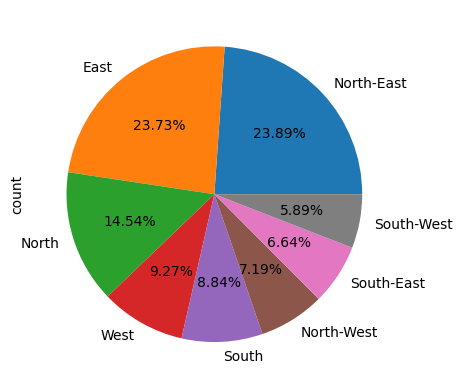

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2055,2162,house,independent,sector 53,4.00,17778.0,5.0,5.0,2,3.0,Relatively New,2250.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0
982,1024,flat,bestech park view grand spa,sector 81,2.20,8271.0,3.0,4.0,3+,8.0,Relatively New,2481.0,0.0,1.0,0.0,0.0,0.0,2.0,165.0
2288,2420,flat,emaar imperial gardens,sector 102,2.05,9875.0,3.0,4.0,3+,14.0,Relatively New,2250.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0
123,129,flat,ss the leaf,sector 85,1.14,6433.0,2.0,2.0,3,16.0,Relatively New,1604.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
905,941,flat,shree vardhman flora,sector 90,0.64,4923.0,2.0,2.0,3,6.0,Old Property,1199.0,1.0,0.0,0.0,0.0,0.0,0.0,103.0


In [46]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [49]:
df['agePossession'].value_counts()

agePossession
Relatively New        1608
New Property           555
Moderately Old         544
Old Property           292
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
43,46,flat,unitech sunbreeze,sector 69,1.00,5476.0,4.0,3.0,0,0.0,Undefined,1826.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,59,house,independent,sector 17,3.00,11111.0,4.0,4.0,0,1.0,Undefined,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,62,flat,satya the hermitage,sector 103,0.80,5517.0,2.0,2.0,0,10.0,Undefined,1450.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
60,64,flat,godrej summit premia towers,sector 104,0.90,7149.0,2.0,2.0,0,16.0,Undefined,1259.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,79,house,independent,sector 7,1.20,11194.0,2.0,4.0,2,3.0,Undefined,1072.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,3732,house,independent,sector 8,0.45,9000.0,1.0,1.0,1,3.0,Undefined,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3505,3746,flat,trisara our homes 3,sohna road,0.40,4479.0,2.0,2.0,2,1.0,Undefined,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532,3777,flat,tulip lemon,sector 69,0.60,11407.0,2.0,1.0,1,11.0,Undefined,584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3538,3783,flat,aipl zen residences,sector 70a,1.40,11094.0,2.0,2.0,2,16.0,Undefined,1262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
New Property           584
Moderately Old         581
Old Property           326
Under Construction     278
Undefined               53
Name: count, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1741
Moderately Old         588
New Property           585
Old Property           329
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1743
Moderately Old         619
New Property           585
Old Property           329
Under Construction     278
Name: count, dtype: int64

In [60]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [63]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [62]:
df.shape

(3554, 19)